In [243]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import numpy.ma as ma
import cartopy.crs as ccrs

import mplotutils as mpu
import cf_units
from tqdm import tqdm_notebook as tqdm

import glob


In [432]:
def linregress_grid(df,df_time,start,end):
    x,y=np.meshgrid(np.arange(36),np.arange(72))
    slope=np.zeros([36,72])
    i_start=np.where(df_time==start)[0][0]
    i_end=np.where(df_time==end)[0][0]
    
    for i_x, i_y in zip(x.flatten(),y.flatten()):
        slope[i_x,i_y]=100*stats.linregress(np.arange(end-start),df[i_start:i_end,i_x,i_y])[0]
    return slope

def mean_trend_from_dict(df,df_time,start,end, roll=False):
    
    all_trends=np.stack([linregress_grid(df[key],df_time,start,end) for key in tqdm(df.keys())])
    
    if roll:
        return np.roll(np.mean(all_trends,axis=0),36,1)
    else:
        return np.mean(all_trends,axis=0)
    
def trend_dist_from_dict(df,df_time,start,end, roll=False):
    
    all_trends=np.stack([linregress_grid(df[key],df_time,start,end) for key in tqdm(df.keys())])
    
    if roll:
        return np.roll(np.quantile(all_trends,[0.05,0.95],axis=0),36,1)
    else:
        return np.quantile(all_trends,[0.05,0.95],axis=0)
    
def trend_from_dict(df,df_time,start,end, roll=False):
    
    all_trends=np.stack([linregress_grid(df[key],df_time,start,end) for key in tqdm(df.keys())])
    
    if roll:
        return np.roll(all_trends,36,1)
    else:
        return all_trends
        
            
            
    

In [389]:
##read in observations
hadcrut_anom={}

dir_var_hn='/net/exo/landclim/data/dataset/HadCRUT/v4.6.0.0/5deg_lat-lon_1m/original/'
obs_name_list=sorted(glob.glob(dir_var_hn+'HadCRUT.4.6.0.0.anomalies.*.nc'))

for i,obs_name in enumerate(obs_name_list): 
    data=xr.open_mfdataset(obs_name).groupby('time.year').mean('time').roll(longitude=180, roll_coords=True).sel(year=slice('1869-01-01', '2101-01-01'))
    hadcrut_anom[i]=data.temperature_anomaly.values
    

hadcrut_med=xr.open_mfdataset('/net/exo/landclim/data/dataset/HadCRUT/v4.6.0.0/5deg_lat-lon_1m/original/HadCRUT.4.6.0.0.median.nc')
hadcrut_med=hadcrut_med.groupby('time.year').mean('time')#.sel(time=slice('1870-01-01', '2101-01-01'))

trend_2010_hadcrut_med={}
trend_2018_hadcrut_med={}

trend_2010_hadcrut={}
trend_2018_hadcrut={}



for ref in [1951]:
    
    trend_2010_hadcrut_med[ref]=linregress_grid(hadcrut_med.sel(year=slice(1870,2021)).roll(longitude=180, roll_coords=True).temperature_anomaly.values,
                         hadcrut_med.sel(year=slice(1870,2021)).year.values,ref,2010)

    
    trend_2018_hadcrut_med[ref]=linregress_grid(hadcrut_med.sel(year=slice(1870,2021)).roll(longitude=180, roll_coords=True).temperature_anomaly.values,
                         hadcrut_med.sel(year=slice(1870,2021)).year.values,ref,2018)

    trend_2010_hadcrut[ref]=trend_dist_from_dict(hadcrut_anom,np.arange(1870,2021),ref,2010)
    trend_2018_hadcrut[ref]=trend_dist_from_dict(hadcrut_anom,np.arange(1870,2021),ref,2018)

/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encoun

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

/home/snath/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'`

(0.0, 1.0, 0.0, 1.0)

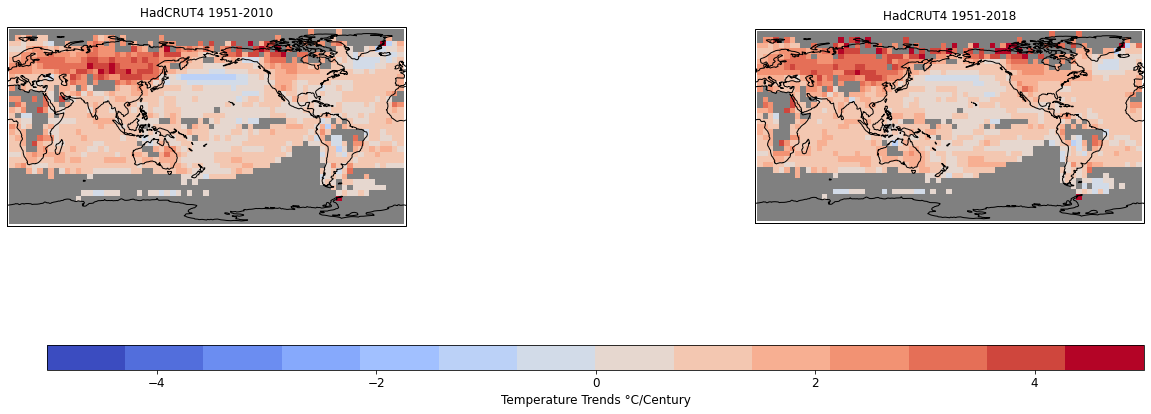

In [475]:
##plot trends 

n_col = 2
n_row = 3

fs_title=16

fig=plt.figure(figsize=(n_col*13, n_row * 11))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'mathtext.default':'regular'}) 
plt.rcParams.update({'mathtext.default':'it'}) 


grid = plt.GridSpec(n_row*3, n_col*9+3, wspace=1, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
lons=hadcrut_med.longitude.values
lats=hadcrut_med.latitude.values

i=0
for ref in [1951]:
    
    i_y=0

    ax = plt.subplot(grid[i+1:i+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))

    i_y+=1
    i+=1
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, trend_2010_hadcrut_med[ref], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("HadCRUT4 %i-2010"%(ref),y=1.02,fontsize=12)
    cmap_mesh=mesh_1.get_cmap()
    cmap_mesh.set_bad('gray')
    mesh_1.set_cmap(cmap_mesh)
    
    ax = plt.subplot(grid[i-(i%2)+1:i-(i%2)+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))
    i_y+=1
    
    i+=1
    
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, trend_2018_hadcrut_med[ref], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("HadCRUT4 %i-2018"%(ref),y=1.02,fontsize=12)
    cmap_mesh=mesh_1.get_cmap()
    cmap_mesh.set_bad('gray')
    mesh_1.set_cmap(cmap_mesh)

    
axcbar = plt.subplot(grid[i-(i%2):i-(i%2)+1,5:25])
cbar=plt.colorbar(mesh_1,orientation='horizontal',fraction=0.4,aspect=45)
cbar.set_label('Temperature Trends °C/Century')  
plt.axis('off')   

    
    


In [7]:
##Get MIROC 6 Model results
from loading import load_data_single_mod
import glob

##create datasetsfor allforcing af, historical natural hn and preindustrial control piCONTROL
y_af={}
y_hn={}
y_pi={}
time={}

models=['MIROC6','IPSL-CM6A-LR','CanESM5','HadGEM3-GC31-LL','CNRM-CM6-1','GFDL-ESM4','ACCESS-ESM1-5','BCC-CSM2-MR',
       'NorESM2-LM','CESM2']

for model in models:
    
 
    y_af[model],time[model],srex,srex_names,df_srex,lon_pc,lat_pc,idx_l,wgt_l=load_data_single_mod(6,model,'ssp585',Tanglob_idx=False,Tref_all=False,Tref_start='1961-01-01',Tref_end='1991-01-01')
    
        
    dir_var_hn='/net/so4/landclim/snath/DA/data/%s/regridded/'%model
    run_name_hn_list=sorted(glob.glob(dir_var_hn+'tas_ann_'+model+'_hist-nat_'+'r*i1p1f*'+'_g05.nc'))
    y_hn[model]={}
    for i,run_name_hn in enumerate(run_name_hn_list): 
        data=xr.open_mfdataset(run_name_hn).sel(time=slice('1870-01-01', '2101-01-01')) ## select 1870 onwards (usually goes till 2018)
        y_hn[model][i]=data.tas.values
        
    dir_var_pi='/net/so4/landclim/snath/DA/data/%s/regridded/'%model
    run_name_pi_list=sorted(glob.glob(dir_var_hn+'tas_ann_'+model+'_piControl_'+'r*i1p1f*'+'_g05.nc'))
    y_pi[model]={}
    for i,run_name_pi in enumerate(run_name_pi_list): 
        data=xr.open_mfdataset(run_name_pi)
        y_pi[model][i]=data.tas.values


start with model MIROC6
['/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r10i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r11i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r12i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r13i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r14i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r15i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r16i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r17i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r18i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r19i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

create ref for  /net/so4/landclim/snath/DA/data/MIROC6/regridded/tas_ann_MIROC6_ssp585_r1i1p1f1_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/home/snath/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name

start with model IPSL-CM6A-LR
['/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r14i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r1i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r2i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r3i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r4i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r6i1p1f1_g05.nc']
create ref for  /net/so4/landclim/snath/DA/data/IPSL-CM6A-LR/regridded/tas_ann_IPSL-CM6A-LR_ssp585_r1i1p1f1_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/home/snath/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
o

start with model CanESM5
['/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r10i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r11i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r12i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r13i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r14i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r15i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r16i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r17i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r18i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r19i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CanESM5/reg

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

create ref for  /net/so4/landclim/snath/DA/data/CanESM5/regridded/tas_ann_CanESM5_ssp585_r1i1p1f1_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

start with model HadGEM3-GC31-LL
['/net/so4/landclim/snath/DA/data/HadGEM3-GC31-LL/regridded/tas_ann_HadGEM3-GC31-LL_ssp585_r1i1p1f3_g05.nc', '/net/so4/landclim/snath/DA/data/HadGEM3-GC31-LL/regridded/tas_ann_HadGEM3-GC31-LL_ssp585_r2i1p1f3_g05.nc', '/net/so4/landclim/snath/DA/data/HadGEM3-GC31-LL/regridded/tas_ann_HadGEM3-GC31-LL_ssp585_r3i1p1f3_g05.nc', '/net/so4/landclim/snath/DA/data/HadGEM3-GC31-LL/regridded/tas_ann_HadGEM3-GC31-LL_ssp585_r4i1p1f3_g05.nc']
create ref for  /net/so4/landclim/snath/DA/data/HadGEM3-GC31-LL/regridded/tas_ann_HadGEM3-GC31-LL_ssp585_r1i1p1f3_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

start with model CNRM-CM6-1
['/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r1i1p1f2_g05.nc', '/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r2i1p1f2_g05.nc', '/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r3i1p1f2_g05.nc', '/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r4i1p1f2_g05.nc', '/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r5i1p1f2_g05.nc', '/net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r6i1p1f2_g05.nc']
create ref for  /net/so4/landclim/snath/DA/data/CNRM-CM6-1/regridded/tas_ann_CNRM-CM6-1_ssp585_r1i1p1f2_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In xarray version 0.15 the d

start with model GFDL-ESM4
['/net/so4/landclim/snath/DA/data/GFDL-ESM4/regridded/tas_ann_GFDL-ESM4_ssp585_r1i1p1f1_g05.nc']
create ref for  /net/so4/landclim/snath/DA/data/GFDL-ESM4/regridded/tas_ann_GFDL-ESM4_ssp585_r1i1p1f1_g05.nc
start with model ACCESS-ESM1-5
['/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r10i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r1i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r2i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r3i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r4i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r5i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r6i1p1f1_g05.nc', '/net/

/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on plea

create ref for  /net/so4/landclim/snath/DA/data/ACCESS-ESM1-5/regridded/tas_ann_ACCESS-ESM1-5_ssp585_r1i1p1f1_g05.nc


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

start with model BCC-CSM2-MR
['/net/so4/landclim/snath/DA/data/BCC-CSM2-MR/regridded/tas_ann_BCC-CSM2-MR_ssp585_r1i1p1f1_g05.nc']
create ref for  /net/so4/landclim/snath/DA/data/BCC-CSM2-MR/regridded/tas_ann_BCC-CSM2-MR_ssp585_r1i1p1f1_g05.nc
start with model NorESM2-LM
['/net/so4/landclim/snath/DA/data/NorESM2-LM/regridded/tas_ann_NorESM2-LM_ssp585_r1i1p1f1_g05.nc']


/net/so4/landclim/snath/DA/loading.py:226: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data = xr.open_mfdataset([run_name_hist,run_name_ssp],concat_dim='time').sel(time=slice('1870-01-01', '2101-01-01'))
/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concate

create ref for  /net/so4/landclim/snath/DA/data/NorESM2-LM/regridded/tas_ann_NorESM2-LM_ssp585_r1i1p1f1_g05.nc
start with model CESM2
['/net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r10i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r11i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r1i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r2i1p1f1_g05.nc', '/net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r4i1p1f1_g05.nc']


/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/home/snath/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/home/snath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: In xarray version 0.15 the d

create ref for  /net/so4/landclim/snath/DA/data/CESM2/regridded/tas_ann_CESM2_ssp585_r1i1p1f1_g05.nc


In [34]:
from scipy.stats import linregress

## Drift correct the models preindustrial control runs
y_pi_dc={}

for model in models:
    
    if len(y_pi[model])>1:
        y_pi_temp=np.vstack(([y_pi[model][key] for key in y_pi[model].keys()]))
        y_pi_dc[model]=np.zeros_like(y_pi_temp)
    else:
        y_pi_dc[model]=np.zeros_like(y_pi[model][0])
        
    x,y=np.meshgrid(np.arange(y_pi[model][0].shape[1]),np.arange(y_pi[model][0].shape[2]))
    
    i_key=0
    for key in y_pi[model].keys():
        for i_x, i_y in zip(x.flatten(),y.flatten()):
            #print(i_x,i_y)
            slope, intercept,_,_,_=linregress(np.arange(y_pi[model][key].shape[0]),
                                              y_pi[model][key][:,i_x,i_y])
            drift=slope*np.arange(y_pi[model][key].shape[0])+intercept
            y_pi_dc[model][i_key:i_key+y_pi[model][key].shape[0],i_x,i_y]=y_pi[model][key][:,i_x,i_y]-drift
            
        i_key+=y_pi[model][key].shape[0]
    
    y_pi_dc[model]=np.roll(y_pi_dc[model],36,2)
            
    
        
    
    
    
    
        

In [391]:
trend_2010_hn={}
trend_2018_hn={}

trend_2010_af={}
trend_2018_af={}

resampled_trend_hn_2010={}
resampled_trend_af_2010={}

resampled_trend_hn_2018={}
resampled_trend_af_2018={}

n_samples=50

for model in models:
    
    print('Creating trend distribution for', model)
    time[model]=np.arange(1870,2101)
    trend_2010_hn[model]={}
    trend_2018_hn[model]={}

    trend_2010_af[model]={}
    trend_2018_af[model]={}

    resampled_trend_hn_2010[model]={}
    resampled_trend_af_2010[model]={}

    resampled_trend_hn_2018[model]={}
    resampled_trend_af_2018[model]={}

    

    for ref in [1951]:


     
        trend_2010_hn[model][ref]=mean_trend_from_dict(y_hn[model],time[model],ref,2010,roll=True)
        if model=='CESM2':
            trend_2018_hn[model][ref]=mean_trend_from_dict(y_hn[model],time[model],ref,2014,roll=True)
        else:
            trend_2018_hn[model][ref]=mean_trend_from_dict(y_hn[model],time[model],ref,2018,roll=True)

        trend_2010_af[model][ref]=mean_trend_from_dict(y_af[model],time[model],ref,2010,roll=True)
        trend_2018_af[model][ref]=mean_trend_from_dict(y_af[model],time[model],ref,2018,roll=True)

        #start resampling procedure for creation of distribution

        resampled_trend_hn_2010[model][ref]=np.zeros([n_samples,trend_2010_hn[model][ref].shape[0],
                                              trend_2010_hn[model][ref].shape[1]])
        resampled_trend_af_2010[model][ref]=np.zeros([n_samples,trend_2010_af[model][ref].shape[0],
                                              trend_2010_af[model][ref].shape[1]])


        resampled_trend_hn_2018[model][ref]=np.zeros([n_samples,trend_2018_hn[model][ref].shape[0],
                                              trend_2018_hn[model][ref].shape[1]])

        resampled_trend_af_2018[model][ref]=np.zeros([n_samples,trend_2018_af[model][ref].shape[0],
                                              trend_2018_af[model][ref].shape[1]])

   
        for sample in tqdm(range(n_samples)):

            start_pi=np.random.randint(0,y_pi_dc[model].shape[0]-150)
            end_pi=start_pi+150

            resampled_trend_hn_2010[model][ref][sample,:,:]=(linregress_grid(y_pi_dc[model],np.arange(y_pi_dc[model].shape[0]),
                                                                        start_pi,end_pi)+trend_2010_hn[model][ref])
            resampled_trend_af_2010[model][ref][sample,:,:]=(linregress_grid(y_pi_dc[model],np.arange(y_pi_dc[model].shape[0]),
                                                                        start_pi,end_pi)+trend_2010_af[model][ref])
            resampled_trend_hn_2018[model][ref][sample,:,:]=(linregress_grid(y_pi_dc[model],np.arange(y_pi_dc[model].shape[0]),
                                                                        start_pi,end_pi)+trend_2018_hn[model][ref])
            resampled_trend_af_2018[model][ref][sample,:,:]=(linregress_grid(y_pi_dc[model],np.arange(y_pi_dc[model].shape[0]),
                                                                        start_pi,end_pi)+trend_2018_af[model][ref])
            

Creating trend distribution for MIROC6


Creating trend distribution for IPSL-CM6A-LR


Creating trend distribution for CanESM5


Creating trend distribution for HadGEM3-GC31-LL


Creating trend distribution for CNRM-CM6-1


Creating trend distribution for GFDL-ESM4


Creating trend distribution for ACCESS-ESM1-5


Creating trend distribution for BCC-CSM2-MR


Creating trend distribution for NorESM2-LM


Creating trend distribution for CESM2


In [392]:
for ref in [1951]:
    
    resampled_trend_hn_2010[ref]=np.vstack(([resampled_trend_hn_2010[mod][ref] for mod in models]))
    resampled_trend_hn_2018[ref]=np.vstack(([resampled_trend_hn_2018[mod][ref] for mod in models]))
    
    resampled_trend_af_2010[ref]=np.vstack(([resampled_trend_af_2010[mod][ref] for mod in models]))
    resampled_trend_af_2018[ref]=np.vstack(([resampled_trend_af_2018[mod][ref] for mod in models]))

(0.0, 1.0, 0.0, 1.0)

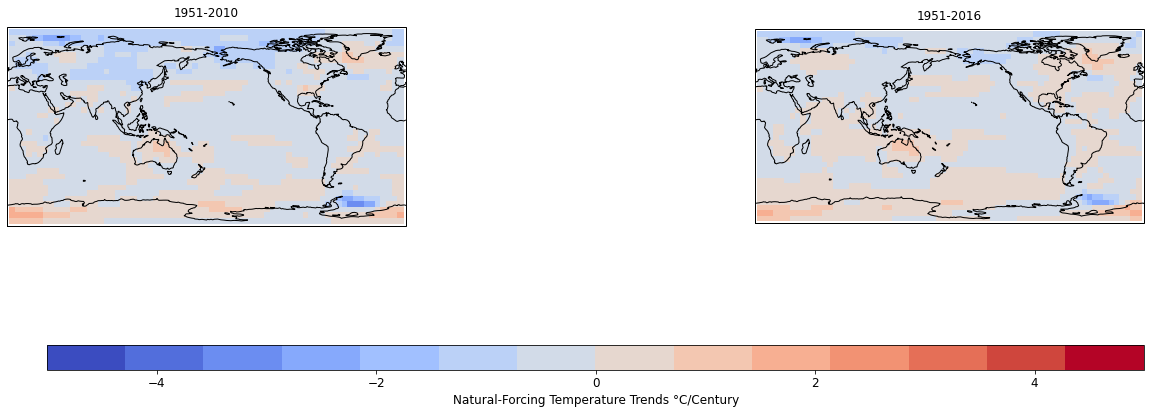

In [393]:
n_col = 2
n_row = 3

fs_title=16

fig=plt.figure(figsize=(n_col*13, n_row * 11))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'mathtext.default':'regular'}) 
plt.rcParams.update({'mathtext.default':'it'}) 


grid = plt.GridSpec(n_row*3, n_col*9+3, wspace=1, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


i=0
for ref in [1951]:
    
    i_y=0

    ax = plt.subplot(grid[i+1:i+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))

    i_y+=1
    i+=1
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, resampled_trend_hn_2010[ref][0,:,:], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("%i-2010"%(ref),y=1.02,fontsize=12)
    
    
    ax = plt.subplot(grid[i-(i%2)+1:i-(i%2)+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))
    i_y+=1
    
    i+=1
    
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, resampled_trend_hn_2018[ref][0,:,:], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("%i-2016"%(ref),y=1.02,fontsize=12)

    
axcbar = plt.subplot(grid[i-(i%2):i-(i%2)+1,5:25])
cbar=plt.colorbar(mesh_1,orientation='horizontal',fraction=0.4,aspect=45)
cbar.set_label('Natural-Forcing Temperature Trends °C/Century')  
plt.axis('off')   


(0.0, 1.0, 0.0, 1.0)

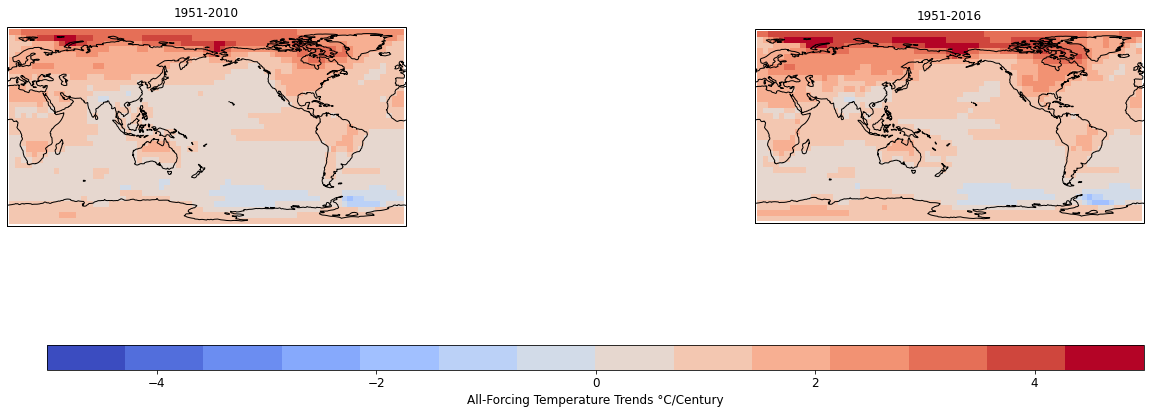

In [394]:
n_col = 2
n_row = 3

fs_title=16

fig=plt.figure(figsize=(n_col*13, n_row * 11))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'mathtext.default':'regular'}) 
plt.rcParams.update({'mathtext.default':'it'}) 


grid = plt.GridSpec(n_row*3, n_col*9+3, wspace=1, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


i=0
for ref in [1951]:
     
    i_y=0

    ax = plt.subplot(grid[i+1:i+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))

    i_y+=1
    i+=1
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, resampled_trend_af_2010[ref][0,:,:], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("%i-2010"%(ref),y=1.02,fontsize=12)
    
    
    ax = plt.subplot(grid[i-(i%2)+1:i-(i%2)+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))
    i_y+=1
    
    i+=1
    
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, resampled_trend_af_2018[ref][0,:,:], transform=ccrs.PlateCarree(central_longitude=180), cmap=plt.cm.get_cmap('coolwarm',14),vmin=-5,vmax=5,rasterized=True)
    ax.set_title("%i-2016"%(ref),y=1.02,fontsize=12)

    
axcbar = plt.subplot(grid[i-(i%2):i-(i%2)+1,5:25])
cbar=plt.colorbar(mesh_1,orientation='horizontal',fraction=0.4,aspect=45)
cbar.set_label('All-Forcing Temperature Trends °C/Century')  
plt.axis('off')   


In [648]:
from scipy.stats import percentileofscore

## need to find a more elegant method, this is quick and dirty

def attr_categorize(af_quantiles,hn_quantiles,obs_trend):
    sign=np.sign(obs_trend)
    
    percentile_af=percentileofscore(af_quantiles,obs_trend)
    percentile_hn=percentileofscore(hn_quantiles,obs_trend)
    
    if sign==1:
        if percentile_af>5 and percentile_af<95:
            if percentile_hn<=95:
                return 0
            else:
                return 2
        elif (percentile_hn<95 and percentile_hn>5):
            return 0
        elif (percentile_af<=5 and percentile_hn>=95):
            return 1
        elif percentile_af>=95:
            return 3
        elif percentile_hn<=5:
            return 0
    elif sign==-1:
        
        if (percentile_af<95 and percentile_af>5):
            if percentile_hn>=5:
                return 0
            else:
                return -2
        elif (percentile_hn>5 and percentile_hn<95):
            return 0
        elif (percentile_hn<=5 and percentile_af>=95):
            return -1
        elif percentile_af<=5:
            return -3
        if percentile_hn>=95:
            return 0
        
        
        

def attr_categorize_from_dist(af_quantiles,hn_quantiles,obs_quantiles):
    sign_0=np.sign(obs_quantiles[0])
    sign_1=np.sign(obs_quantiles[1])
    
    percentile_af_5=percentileofscore(af_quantiles,obs_quantiles[0])
    percentile_hn_5=percentileofscore(hn_quantiles,obs_quantiles[0])
    
    percentile_af_95=percentileofscore(af_quantiles,obs_quantiles[1])
    percentile_hn_95=percentileofscore(hn_quantiles,obs_quantiles[1])
    
    if sign_0==1 and sign_1==1:
        if percentile_af_95<95 and percentile_af_5>5:
            if percentile_hn_5<=95:
                return 0
            else:
                return 2
        elif percentile_hn_95<95 and percentile_hn_5>5:
            return 0
        elif percentile_af_95<=95 and percentile_hn_95>=95:
            return 1
        elif percentile_af_95>=95:
            if percentile_hn_5<95:
                return 0
            else:
                return 3
        elif percentile_hn_5<=5:
            return 0
        else:
            print(sign_0,sign_1,percentile_af_95,percentile_af_5,percentile_hn_95,percentile_hn_5)

        
    elif sign_0==-1 and sign_1==-1:
        if percentile_af_95<95 and percentile_af_5>5:
            if percentile_hn_95>5:
                return 0
            else:
                return -2
        elif percentile_hn_95<95 and percentile_hn_5>5:
            return 0
        elif percentile_af_95>=95 and percentile_hn_5<=5:
            return -1
        elif percentile_af_5<=5:
            if percentile_hn_95>5:
                return 0
            else:
                return -3
        elif percentile_hn_95>=95:
            return 0
        else:
            print(sign_0,sign_1,percentile_af_95,percentile_af_5,percentile_hn_95,percentile_hn_5)

        
    elif sign_0==-1 and sign_1==1:
        
        if percentile_af_95<percentile_hn_95:
            if percentile_af_95<95 and percentile_af_5>5:
                if percentile_hn_5<=95:
                    return 0
                else:
                    return 2
            elif percentile_hn_95<5 and percentile_hn_5>5:
                return 0
            elif percentile_af_95<=5 and percentile_hn_95>=95:
                return 1
            elif percentile_af_95>=95:
                if percentile_hn_5<95:
                    return 0
                else:
                    print(sign_0,sign_1,percentile_af_95,percentile_af_5,percentile_hn_95,percentile_hn_5)
                    return 3
            elif percentile_hn_5<=5:
                return 0
        elif percentile_af_95>percentile_hn_95:
            if percentile_af_95<95 and percentile_af_5>5:
                if percentile_hn_95>=5:
                    return 0
                else:
                    return -2
            elif percentile_hn_95<95 and percentile_hn_5>5:
                return 0
            elif percentile_af_95>=95 and percentile_hn_5<=5:
                return -1
            elif percentile_af_5<=5:
                if percentile_hn_95>5:
                    return 0
                else:
                    return -3
            elif percentile_hn_95>=95:
                return 0
        elif percentile_af_5<percentile_hn_5:
            if percentile_af_95<95 and percentile_af_5>5:
                if percentile_hn_5<=95:
                    return 0
                else:
                    return 2
            elif percentile_hn_95<5 and percentile_hn_5>5:
                return 0
            elif percentile_af_95<=5 and percentile_hn_95>=95:
                return 1
            elif percentile_af_95>=95:
                if percentile_hn_5<95:
                    return 0
                else:
                    return 3
            elif percentile_hn_5<=5:
                return 0
        elif percentile_af_5>percentile_hn_95:
            if percentile_af_95<95 and percentile_af_5>5:
                if percentile_hn_95>=5:
                    return 0
                else:
                    return -2
            elif percentile_hn_95<95 and percentile_hn_5>5:
                return 0
            elif percentile_af_95>=95 and percentile_hn_5<=5:
                return -1
            elif percentile_af_5<=5:
                if percentile_hn_95>5:
                    return 0
                else:
                    return -3
            elif percentile_hn_95>=95:
                return 0
       
        else:
            print(sign_0,sign_1,percentile_af_95,percentile_af_5,percentile_hn_95,percentile_hn_5)
     
        
        
    
    

In [649]:
## Assign attribution categories based on median values (deprecated)
ref=1951

attr_2010=np.full([36,72],np.nan)
attr_2018=np.full([36,72],np.nan)

x,y=np.meshgrid(np.arange(36),np.arange(72))

for i_x, i_y in zip(x.flatten(),y.flatten()):
    attr_2010[i_x,i_y]=attr_categorize(resampled_trend_af_2010[ref][:,i_x,i_y],
                                                         resampled_trend_hn_2010[ref][:,i_x,i_y],
                                            trend_2010_hadcrut_med[ref].reshape(1,36,72)[:,i_x,i_y])
    attr_2018[i_x,i_y]=attr_categorize(resampled_trend_af_2018[ref][:,i_x,i_y],
                                                         resampled_trend_hn_2018[ref][:,i_x,i_y],
                                            trend_2018_hadcrut_med[ref].reshape(1,36,72)[:,i_x,i_y])


In [650]:
## Assign attribution categories based on distribution
ref=1951

attr_2010=np.full([36,72],np.nan)
attr_2018=np.full([36,72],np.nan)

x,y=np.meshgrid(np.arange(36),np.arange(72))

for i_x, i_y in zip(x.flatten(),y.flatten()):
    attr_2010[i_x,i_y]=attr_categorize_from_dist(resampled_trend_af_2010[ref][:,i_x,i_y],
                                                         resampled_trend_hn_2010[ref][:,i_x,i_y],
                                            trend_2010_hadcrut[ref].reshape(2,36,72)[:,i_x,i_y])
    attr_2018[i_x,i_y]=attr_categorize_from_dist(resampled_trend_af_2018[ref][:,i_x,i_y],
                                                         resampled_trend_hn_2018[ref][:,i_x,i_y],
                                            trend_2018_hadcrut[ref].reshape(2,36,72)[:,i_x,i_y])


(0.0, 1.0, 0.0, 1.0)

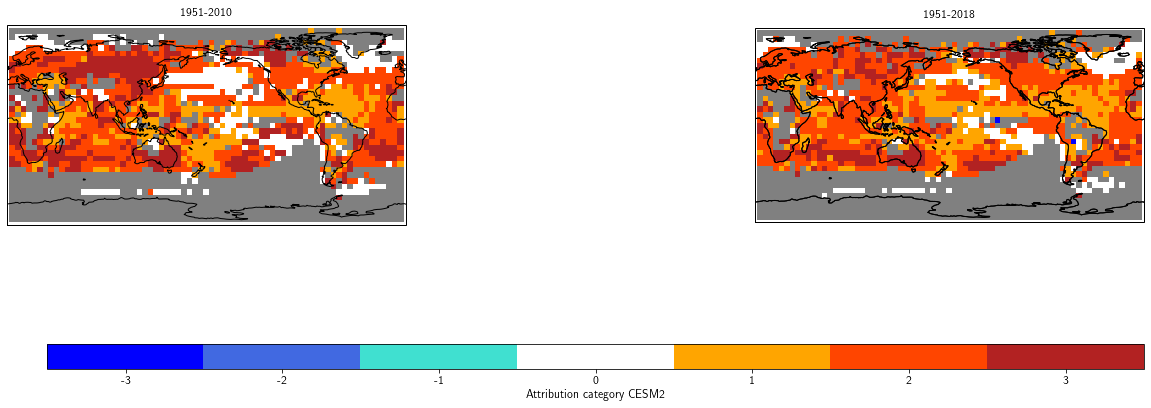

In [651]:
import matplotlib as mpl
n_col = 2
n_row = 3

fs_title=16

fig=plt.figure(figsize=(n_col*13, n_row * 11))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'mathtext.default':'regular'}) 
plt.rcParams.update({'mathtext.default':'it'}) 


grid = plt.GridSpec(n_row*3, n_col*9+3, wspace=1, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

cmap = mpl.colors.ListedColormap(['blue','royalblue', 'turquoise','white',
                                  'orange',"orangered",'firebrick'])

bounds = [ -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
i=0
for ref in [1951]:
    
    res_2010_plt=attr_2010
    
    res_2018_plt=attr_2018

    
    plt.title('Trend assessment using observation median values')
    i_y=0

    ax = plt.subplot(grid[i+1:i+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))
    
    ## make fake mesh so colorbar can be plotted without the extra grey bar
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, res_2010_plt, transform=ccrs.PlateCarree(central_longitude=180),cmap=cmap,norm=norm,vmin=-4.5,rasterized=True)
    ax.set_title("%i-2010"%(ref),y=1.02,fontsize=12)
    cmap_mesh=mesh_1.get_cmap()
    cmap_mesh.set_bad('gray')
    mesh_1.set_cmap(cmap_mesh)
    
    i_y+=1
    i+=1

    ax = plt.subplot(grid[i-(i%2)+1:i-(i%2)+2,i_y*15:i_y*15+15], projection=ccrs.PlateCarree(central_longitude=180))

    i_y+=1
    i+=1
    ax.coastlines()
    
    res_2018_plt=attr_2018
    
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, res_2018_plt, transform=ccrs.PlateCarree(central_longitude=180),cmap=cmap,norm=norm,vmin=-4.5,rasterized=True)
    ax.set_title("%i-2018"%(ref),y=1.02,fontsize=12)
    cmap_mesh=mesh_1.get_cmap()
    cmap_mesh.set_bad('gray')
    mesh_1.set_cmap(cmap_mesh)
    
axcbar = plt.subplot(grid[i-(i%2):i-(i%2)+1,5:25])
cbar=plt.colorbar(mesh_1,orientation='horizontal',ticks=[-3,-2,-1,0,1,2,3],fraction=0.4,aspect=45,extend='neither')
cbar.set_label('Attribution category %s'%model)
cbar.ax.set_xlim(-3.5,3.5)
cbar.ax.set_xticklabels(np.arange(-3,4))
plt.axis('off')   


In [646]:
## create dataset 

df_attr=xr.Dataset(
    {
        "Attribution_Category_2018": (["latitude", "longitude"], np.roll(attr_2018,-36,1)),## roll so not pacific centred
        "Attribution_Category_2010": (["latitude", "longitude"], np.roll(attr_2010,-36,1)), ## roll so not pacific centred

    },
    
    coords={
        "longitude": (["longitude"], lons),
        "latitude": (["latitude"], lats),
    },
)

df_attr.to_netcdf('tas_attribution_categories_g05_centred_penultimate.nc')

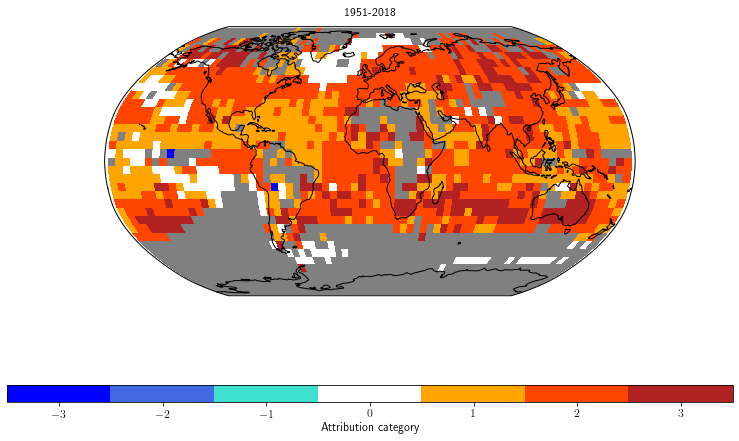

In [647]:
import matplotlib as mpl
n_col = 1
n_row = 1

fs_title=16

fig=plt.figure(figsize=(n_col*13, n_row * 11))
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'mathtext.default':'regular'}) 
plt.rcParams.update({'mathtext.default':'it'}) 


grid = plt.GridSpec(1, 1, wspace=1, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

cmap = mpl.colors.ListedColormap(['blue','royalblue', 'turquoise','white',
                                  'orange',"orangered",'firebrick'])

bounds = [ -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

i=0
for ref in [1951]:
    
    
    ax = plt.subplot(grid[0,0], projection=ccrs.Robinson())

    res_2018_plt=df_attr.Attribution_Category_2018.values
    
    ax.coastlines()
    mesh_1=ax.pcolormesh(lons, lats, res_2018_plt, transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,vmin=-4.5,rasterized=True)
    cmap_mesh=mesh_1.get_cmap()
    cmap_mesh.set_bad('gray')
    mesh_1.set_cmap(cmap_mesh)
    
    ax.set_title("%i-2018"%(ref),y=1.02,fontsize=12)
    
    plt.colorbar(mesh_1,orientation='horizontal',ticks=[-3,-2,-1,0,1,2,3],fraction=0.4,aspect=45,extend='neither',label='Attribution category')

    

# Plotting

In [535]:
## specify lon lat for the precip 2.5 grid
lon=np.array([-178.75, -176.25, -173.75, -171.25, -168.75, -166.25, -163.75,
       -161.25, -158.75, -156.25, -153.75, -151.25, -148.75, -146.25,
       -143.75, -141.25, -138.75, -136.25, -133.75, -131.25, -128.75,
       -126.25, -123.75, -121.25, -118.75, -116.25, -113.75, -111.25,
       -108.75, -106.25, -103.75, -101.25,  -98.75,  -96.25,  -93.75,
        -91.25,  -88.75,  -86.25,  -83.75,  -81.25,  -78.75,  -76.25,
        -73.75,  -71.25,  -68.75,  -66.25,  -63.75,  -61.25,  -58.75,
        -56.25,  -53.75,  -51.25,  -48.75,  -46.25,  -43.75,  -41.25,
        -38.75,  -36.25,  -33.75,  -31.25,  -28.75,  -26.25,  -23.75,
        -21.25,  -18.75,  -16.25,  -13.75,  -11.25,   -8.75,   -6.25,
         -3.75,   -1.25,    1.25,    3.75,    6.25,    8.75,   11.25,
         13.75,   16.25,   18.75,   21.25,   23.75,   26.25,   28.75,
         31.25,   33.75,   36.25,   38.75,   41.25,   43.75,   46.25,
         48.75,   51.25,   53.75,   56.25,   58.75,   61.25,   63.75,
         66.25,   68.75,   71.25,   73.75,   76.25,   78.75,   81.25,
         83.75,   86.25,   88.75,   91.25,   93.75,   96.25,   98.75,
        101.25,  103.75,  106.25,  108.75,  111.25,  113.75,  116.25,
        118.75,  121.25,  123.75,  126.25,  128.75,  131.25,  133.75,
        136.25,  138.75,  141.25,  143.75,  146.25,  148.75,  151.25,
        153.75,  156.25,  158.75,  161.25,  163.75,  166.25,  168.75,
        171.25,  173.75,  176.25,  178.75])
lat=np.array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25,
       -68.75, -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25,
       -48.75, -46.25, -43.75, -41.25, -38.75, -36.25, -33.75, -31.25,
       -28.75, -26.25, -23.75, -21.25, -18.75, -16.25, -13.75, -11.25,
        -8.75,  -6.25,  -3.75,  -1.25,   1.25,   3.75,   6.25,   8.75,
        11.25,  13.75,  16.25,  18.75,  21.25,  23.75,  26.25,  28.75,
        31.25,  33.75,  36.25,  38.75,  41.25,  43.75,  46.25,  48.75,
        51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,  68.75,
        71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75])

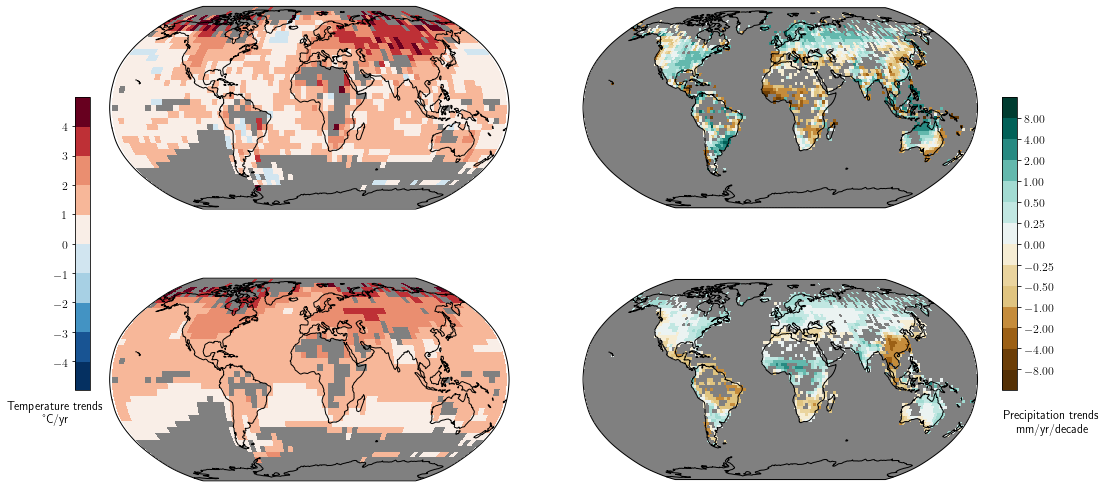

In [643]:
##load precip stuff
gpcc_trend=np.load('trend_1951_2016_gpcc.npy')
trend_af_precip=np.load('trend_1951_2016_af.npy')

fs_title=16

fig=plt.figure(figsize=(19,9))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

cmap = plt.cm.get_cmap('RdBu_r',16)

bounds = [ -5,-4, -3, -2, -1, 0, 1, 2, 3, 4,5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

grid = plt.GridSpec(2, 2, wspace=0.15, hspace=0.25) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax_obs = plt.subplot(grid[0,0], projection=ccrs.Robinson())
ax_obs.coastlines()
mesh_1=ax_obs.pcolormesh(lons, lats, np.roll(trend_2018_hadcrut_med[ref],36,1), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, vmin=-5,vmax=5,rasterized=True)

cmap_mesh=mesh_1.get_cmap()
cmap_mesh.set_bad('gray')
mesh_1.set_cmap(cmap_mesh)

nan_mask = np.isnan(trend_2018_hadcrut_med[ref])
trend_af_plot = np.mean(resampled_trend_af_2018[ref],axis=0)
trend_af_plot[nan_mask] = np.nan

ax_mod = plt.subplot(grid[1,0], projection=ccrs.Robinson())
ax_mod.coastlines()
mesh_2=ax_mod.pcolormesh(lons, lats, np.roll(trend_af_plot,36,1), transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,vmin=-5,vmax=5,rasterized=True)

cmap_mesh=mesh_2.get_cmap()
cmap_mesh.set_bad('gray')
mesh_2.set_cmap(cmap_mesh)

cbar=plt.colorbar(mesh_1, ax=[ax_obs,ax_mod], shrink=0.6,ticks=[-4,-3,-2,-1,0,1,2,3,4],location='left',pad=0.04)
cbar.set_label('Temperature trends \n °C/yr', labelpad=-2, y=-0.12, rotation=0)
##do precip too

cmap = plt.cm.get_cmap('BrBG',24)

bounds = [ -9,-8,-4,-2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2, 4, 8, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax_obs = plt.subplot(grid[0,1], projection=ccrs.Robinson())
ax_obs.coastlines()
mesh_1=ax_obs.pcolormesh(lon, lat, gpcc_trend, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, vmin=-9,vmax=9,rasterized=True)

cmap_mesh=mesh_1.get_cmap()
cmap_mesh.set_bad('gray')
mesh_1.set_cmap(cmap_mesh)

nan_mask = np.isnan(gpcc_trend)
trend_af_precip[nan_mask] = np.nan

ax_mod = plt.subplot(grid[1,1], projection=ccrs.Robinson())
ax_mod.coastlines()
mesh_2=ax_mod.pcolormesh(lon, lat, trend_af_precip, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,vmin=-9,vmax=9,rasterized=True)

cmap_mesh=mesh_2.get_cmap()
cmap_mesh.set_bad('gray')
mesh_2.set_cmap(cmap_mesh)

cbar=plt.colorbar(mesh_1, ax=[ax_obs,ax_mod], shrink=0.6,ticks=[-8,-4,-2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2, 4, 8])#,location='right')
cbar.set_label('Precipitation trends \n mm/yr/decade', labelpad=-2, y=-0.07, rotation=0)




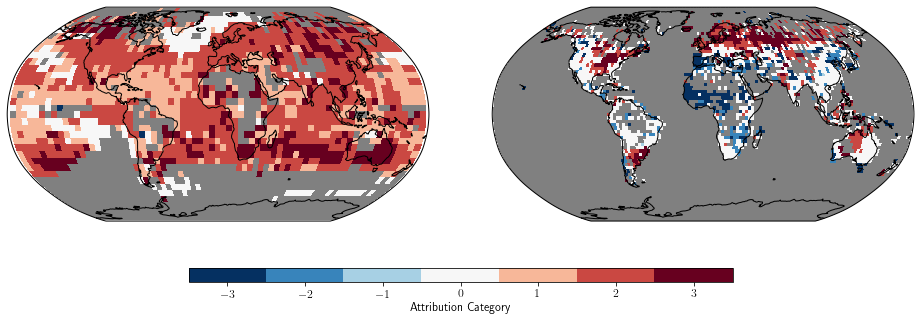

In [638]:
from sklearn.externals import joblib
import matplotlib as mpl

fs_title=16

fig=plt.figure(figsize=(16.25,5.75))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

df_attr_precip=xr.open_dataset('precip_attribution_categories_g05_centred_penultimate.nc')

grid = plt.GridSpec(1, 2, wspace=0.15, hspace=0) # create a grid for the subplots #0.12

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

cmap = plt.cm.get_cmap('RdBu_r',7)

bounds = [ -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


ax_attr_temp = plt.subplot(grid[0,0], projection=ccrs.Robinson())
ax_attr_temp.coastlines()
mesh_3=ax_attr_temp.pcolormesh(lons, lats, df_attr.Attribution_Category_2018.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,rasterized=True)

cmap_mesh=mesh_3.get_cmap()
cmap_mesh.set_bad('gray')
mesh_3.set_cmap(cmap_mesh)

ax_attr_precip = plt.subplot(grid[0,1], projection=ccrs.Robinson())
ax_attr_precip.coastlines()
mesh_4=ax_attr_precip.pcolormesh(lon, lat, df_attr_precip.Attribution_Category_2016.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,rasterized=True)

cmap_mesh=mesh_4.get_cmap()
cmap_mesh.set_bad('gray')
mesh_4.set_cmap(cmap_mesh)

plt.colorbar(mesh_3,ax=[ax_attr_temp, ax_attr_precip],orientation='horizontal',ticks=[-3,-2,-1,0,1,2,3],shrink=0.6, label='Attribution Category',aspect=40)
    